<div align="center"> <h1>Classification</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import f1_score, r2_score
import plotnine as pn

In [2]:
import altair as alt

alt.data_transformers.disable_max_rows()
alt.renderers.enable('altair_viewer')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# We generate "moons" data
data, label = make_moons(n_samples=(100, 100), noise=0.3, random_state=0)

In [4]:
# We make a train-test-split:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

In [5]:
# We configure and fit the model:
classifier = SVC(gamma=2, C=1)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=2)

In [6]:
# We evaluate the model:
y_test_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))
accuracy = np.mean(y_test_pred == y_test)
print('Accuracy: {}'.format(accuracy))
my_f1_score = f1_score(y_test, y_test_pred)
print('F1-Score: {}'.format(my_f1_score))

Accuracy: 0.8833333333333333
Accuracy: 0.8833333333333333
F1-Score: 0.8571428571428572


In [7]:
# We build a DataFrame
data_df = pd.DataFrame(np.append(X_train, X_test, axis=0), columns=['x1', 'x2'])
data_df['train_or_test'] = ['train'] * X_train.shape[0] + ['test'] * X_test.shape[0]
data_df['prediction'] = classifier.predict(np.append(X_train, X_test, axis=0))

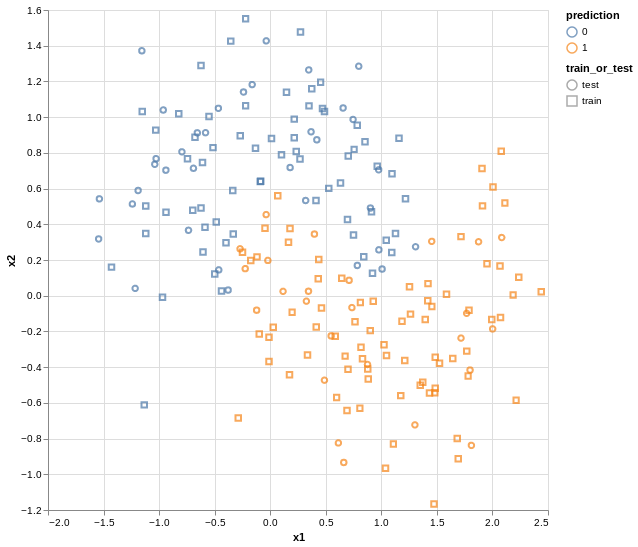

In [8]:
# ... and plot:
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='prediction:N',
        shape='train_or_test:N')
 ) #.show()

In [9]:
# np.concatenate([data, label.ndmin(1, -1)], axis=1)
# np.concatenate([data, label.reshape(110, 1)], axis=1)
# np.concatenate([data, label.reshape(label.shape[0], 1)], axis=1)

In [10]:
# We build a DataFrame
data_train_np = np.concatenate([data, label.reshape(-1, 1)], axis=1)
data_train_df = pd.DataFrame(data_train_np, columns=['x', 'y', 'label'])

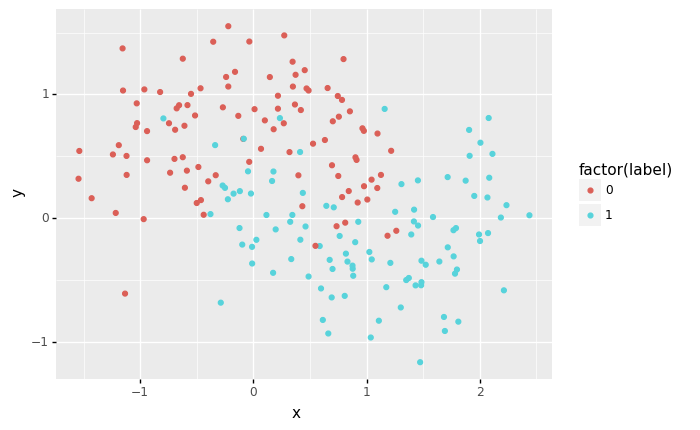

<ggplot: (8756380373640)>


In [11]:
# ... and plot:
gg1 = pn.ggplot(data=data_train_df, mapping=pn.aes(x='x', y='y', color='factor(label)')) + \
    pn.geom_point()
print(gg1)

In [12]:
# We predict new labels and build a DataFrame
y_pred = classifier.predict(data)
col = np.array([(j if i else -1) for i, j in zip(list(y_pred == label), list(label))])
data_train_np = np.concatenate([data, col.reshape(-1, 1)], axis=1)
data_train_df = pd.DataFrame(data_train_np, columns=['x', 'y', 'col'])

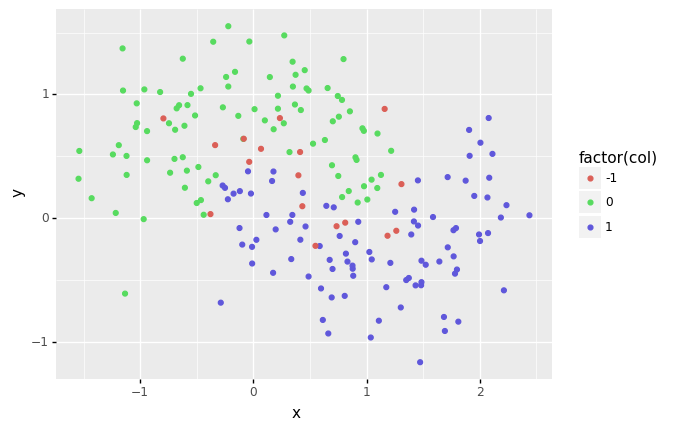

<ggplot: (8756379780813)>


In [13]:
# ... and plot:
gg2 = pn.ggplot(data=data_train_df, mapping=pn.aes(x='x', y='y', color='factor(col)')) + \
     pn.geom_point()
print(gg2)

More information: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html